In [1]:
from utils import load_pairs, get_top_pairs
ncc_pairs = load_pairs('results/ncc_pairs.json')
top_pairs = get_top_pairs(ncc_pairs, 200)

# Identifying correct matches using RANSAC

In [2]:
from homography import RANSAC
ransac = RANSAC(top_pairs)

In [3]:
affine, inliers = ransac.adaptively_fit(probability = 0.9, 
                                        threshold = 1.5, 
                                        num_pairs = 3)


FITTING!!
inf 15
3038.7424680265262 19
1096.7736057831478 26
634.1766767518975 31
339.4825802571875 38
250.16814966599756 42
----------------------------------------------------------


## Matches before RANSAC

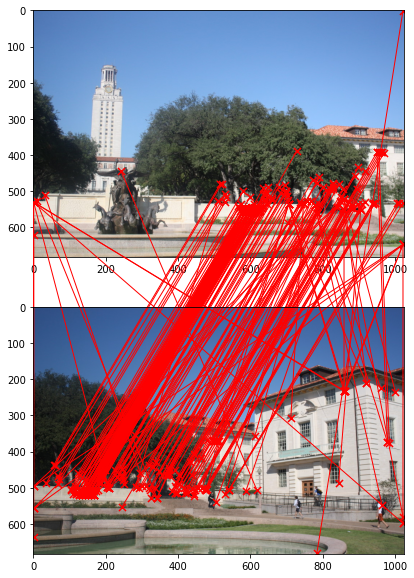

In [4]:
from utils import draw_matches
from utils import load_image, visualize_image

left = load_image('uttower_left.jpg')
right = load_image('uttower_right.jpg')
draw_matches(left, right, list(top_pairs.keys()), set_inches=(10,10))

## Correct Matches after RANSAC

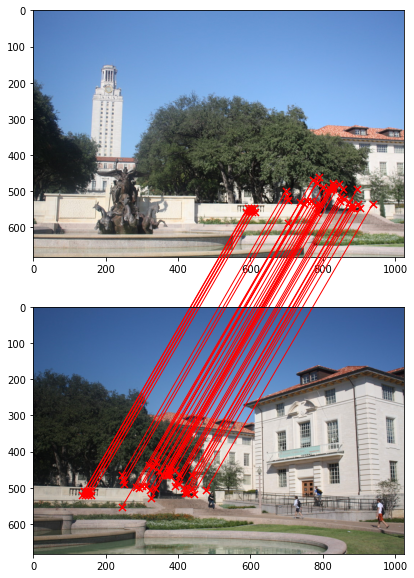

In [5]:
from utils import draw_matches
from utils import load_image, visualize_image

left = load_image('uttower_left.jpg')
right = load_image('uttower_right.jpg')
draw_matches(left, right, inliers, set_inches=(10,10))

# Panorama (Image Stitching)

## Transforming the left image

In [6]:
from panorama import Panorama
pan = Panorama(left, right, affine)
panorama_1 = pan.stitch('left')

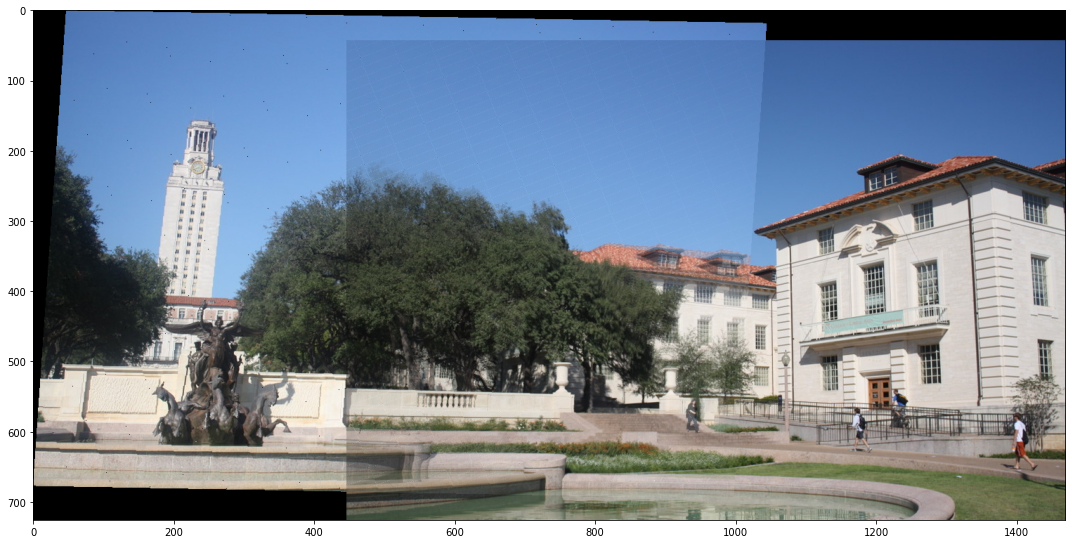

In [7]:
import matplotlib.pyplot as plt
fig_1, ax_1 = plt.subplots(1,1)
ax_1.imshow(panorama_1)
fig_1.set_size_inches(18.5, 10.5)

## Transforming the right image

In [8]:
panorama_2 = pan.stitch('right')

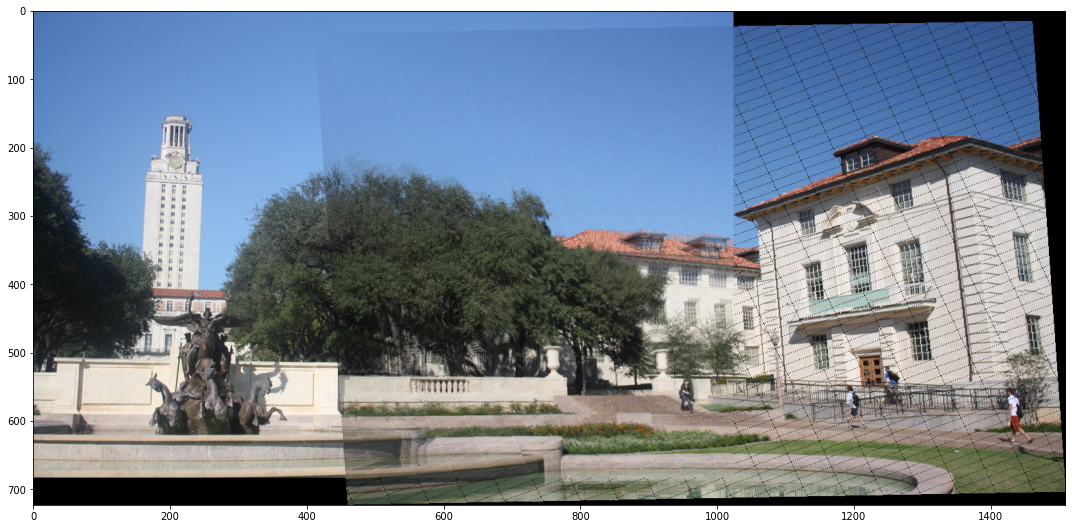

In [9]:
fig_2, ax_2 = plt.subplots(1,1)
ax_2.imshow(panorama_2)
fig_2.set_size_inches(18.5, 10.5)